In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Prelude: common elements between questions

> **Question 1**<br>
> You are designing a large enterprise computing system and you are examining the code that
calls to a persistent storage database system. You have instrumented the code and determined
that the time to service this call request is constant, at 45 milliseconds. You have also studied
the number of requests arriving and observed that this varies with time in a random manner
and is somewhere from one every 100 milliseconds to one every 50 milliseconds. The code
only allows one access to the database at a time.
> 1. Plot the average number of requests (to two places of decimals) in the queue for
arrivals varying in regular intervals in the above range.
> 2. Also plot the average waiting times (rounded to milliseconds). 

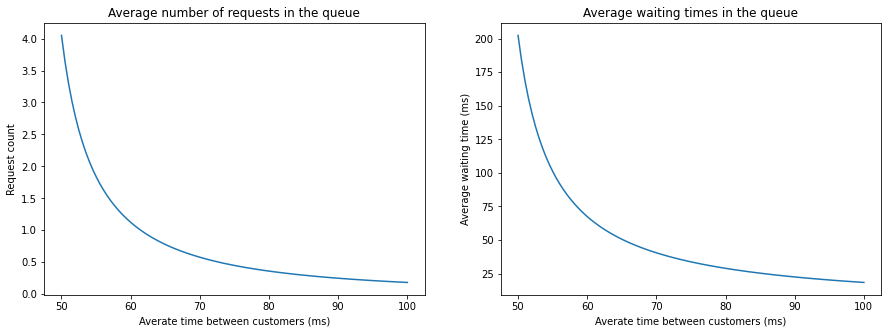

In [7]:
in_time = np.linspace(50, 100, 100) # millis
out_time = 45 # millis

in_rate = 1 / in_time # customers per millisecond
out_rate = 1 / out_time # customers per millisecond

lamb = in_rate
mu = out_rate
rho = lamb / mu

N = (rho/(1 - rho)) * (1 - rho/2)
Nq = N - rho
T = (1/(mu*(1-rho))) * (1 - rho/2)
W = T - 1/mu

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(in_time, Nq)
plt.title("Average number of requests in the queue")
plt.xlabel("Averate time between customers (ms)")
plt.ylabel("Request count")

plt.subplot(122)
plt.plot(in_time, W)
plt.title("Average waiting times in the queue")
plt.xlabel("Averate time between customers (ms)")
plt.ylabel("Average waiting time (ms)");

> **Question 2**<br>
> Suppose you change the data in the database and this lowers the average time to service the
request. When you re-measure the time for service, you notice it varies considerably, and on
average it takes 37 milliseconds. Use the same arrival rates as in Question 1.
> 1. Plot the average number of requests (to two places of decimals) in the queue.
> 2. Also plot the average waiting times.
> 3. As the arrival rate varies, there is a point where a request spends as long waiting in the
queue as the time it takes to serve it (on average). What is the arrival rate and the load
at this critical point?


Very similar to the last question, but this time the MM1 equations instead of the MD1 equations are to be used.

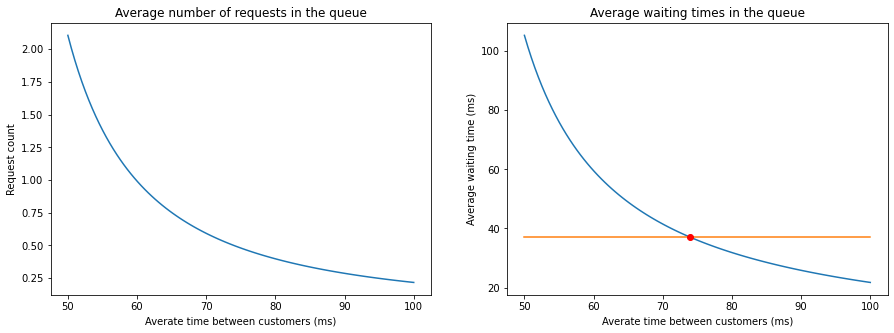

In [24]:
in_time = np.linspace(50, 100, 100) # millis
out_time = 37 # millis

lamb = 1 / in_time # customers per millisecond
mu = 1 / out_time # customers per millisecond
rho = lamb / mu

N = rho/(1 - rho)
Nq = (rho**2) / (1 - rho)
T = (1/mu) / (1 - rho)
W = (1/mu) * rho/(1 - rho)

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(in_time, Nq)
plt.title("Average number of requests in the queue")
plt.xlabel("Averate time between customers (ms)")
plt.ylabel("Request count")

plt.subplot(122)
plt.plot(in_time, W)

plt.plot([min(in_time), max(in_time)], [out_time, out_time])
c = 2/mu # Solving for lambda when W = 1/mu
plt.plot([c], [out_time], "or")

plt.title("Average waiting times in the queue")
plt.xlabel("Averate time between customers (ms)")
plt.ylabel("Average waiting time (ms)");

**Question 3**
> While you are happy with the overall changes, there is still a problem with how long the
requests must wait. Suppose you decide to limit the number of requests that can wait in the
queue to n-1. Now there will be requests rejected (referred to as “lost”) but the ones that get
in should have a shorter waiting time. You think that there is a trade-off between the loss rate
(blocking probability) and the average queueing time (W) rounded to milliseconds.
> 1. Plot the effect on the loss-versus-queueing-time trade-off as n varies. For example,
pick many different values for n, and then vary the inter-arrival times from 100
milliseconds to 30 milliseconds, in regular intervals.
> 2. Comment on what happens when the loading is greater than 1.
> 3. Explore what happens when you fix a load and then vary n to see how the loss rate
and the average queueing time are affected. 

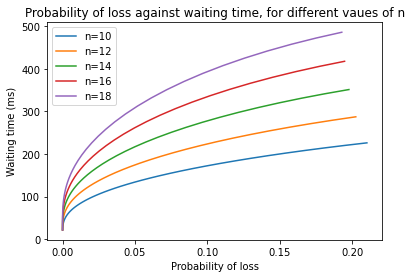

In [100]:
in_time = np.linspace(30, 100, 100) # millis
out_time = 37 # millis

lamb = 1 / in_time # customers per millisecond
mu = 1 / out_time # customers per millisecond
rho = lamb / mu

plt.figure()

for n in [10, 12, 14, 16, 18]:
    
    PL = (1 - rho) * (rho**n) / (1 - rho**(n + 1))
    N = (rho + (rho*n - n - 1) * (rho**(n + 1))) / ((1 - rho**(n + 1))*(1 - rho))
    T = N / (lamb * (1 - PL))
    W = T - 1/mu
        
    plt.plot(PL, W, label=f"n={n}")
    plt.title("Probability of loss against waiting time, for different vaues of n")
    plt.xlabel("Probability of loss")
    plt.ylabel("Waiting time (ms)")

plt.legend();

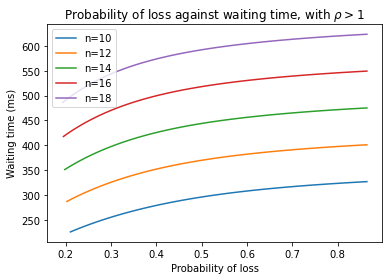

In [102]:
in_time = np.linspace(5, 30, 100) # millis
out_time = 37 # millis

lamb = 1 / in_time # customers per millisecond
mu = 1 / out_time # customers per millisecond
rho = lamb / mu

plt.figure()

for n in [10, 12, 14, 16, 18]:
    
    PL = (1 - rho) * (rho**n) / (1 - rho**(n + 1))
    N = (rho + (rho*n - n - 1) * (rho**(n + 1))) / ((1 - rho**(n + 1))*(1 - rho))
    T = N / (lamb * (1 - PL))
    W = T - 1/mu
        
    plt.plot(PL, W, label=f"n={n}")
    plt.title(r"Probability of loss against waiting time, with $\rho>1$")
    plt.xlabel("Probability of loss")
    plt.ylabel("Waiting time (ms)")

plt.legend();

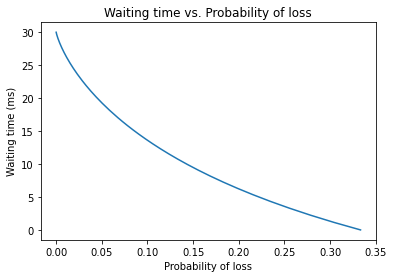

In [98]:
lamb = 1 / 60 # customers per millisecond
mu = 1 / 30 # customers per millisecond
rho = lamb / mu
n = np.linspace(1, 100, 1000) 

PL = (1 - rho) * (rho**n) / (1 - rho**(n + 1))
N = (rho + (rho*n - n - 1) * (rho**(n + 1))) / ((1 - rho**(n + 1))*(1 - rho))
T = N / (lamb * (1 - PL))
W = T - 1/mu
        
plt.figure()
plt.plot(PL, W, label=f"n={n}")
plt.title("Waiting time vs. Probability of loss")
plt.xlabel("Probability of loss")
plt.ylabel("Waiting time (ms)");